In [207]:
import pandas as pd
import os
import zipfile
from geopandas import GeoDataFrame
import wget
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from scipy.spatial.distance import  pdist
from sklearn.mixture import GMM
#import geojson

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
if os.getenv ('PUIDATA') is None:
    os.environ['PUIDATA'] = '/Users/mac/Desktop/CUSP/PUI/PUIdata'

In [5]:
if not os.path.isfile(os.getenv('PUIDATA') + '/' + 'nyc-zip-code-tabulation-areas-polygons.geojson'):
    if not os.path.isfile('nyct2010_16d.zip'):
        !curl -O 'http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/\
        0c0e14e9-78e1-404e-97b0-c2fabceb3981'
        os.system('mv nyc-zip-code-tabulation-areas-polygons.geojson ' + os.getenv('PUIDATA'))

In [9]:
shape_path = os.getenv('PUIDATA') + '/' + 'nyc-zip-code-tabulation-areas-polygons.geojson'
zc_shape = GeoDataFrame.from_file(shape_path)
zc_shape.head(3)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040


In [135]:
zip_data = zc_shape[['geometry']]
#zc.rename(columns = {'postalCode': 'zipcode'})
zip_data['zipcode'] = zc_shape['postalCode']
zip_data.head(3)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,geometry,zipcode
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040


http://www.census.gov/data/datasets/2014/econ/cbp/2014-cbp.html

In [43]:
y = 93
while y < 100:
    file = 'zbp' + str(y) + 'totals.zip'
    if not os.path.isfile(os.getenv('PUIDATA') + '/' + file):
        os.system('curl -O ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/' + file)
        os.system('mv ' + file + ' ' + os.getenv('PUIDATA') + '/HW11')
        y += 1
print('done')

done


In [48]:
y = 0
while y < 2:
    file = 'zbp0' + str(y) + 'totals.zip'
    if not os.path.isfile(os.getenv('PUIDATA') + '/' + file):
        os.system('curl -O ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/' + file)
        os.system('mv ' + file + ' ' + os.getenv('PUIDATA') + '/HW11')
    y += 1
print('done')

done


In [45]:
y = 2
while y < 10:
    file = 'zbp0' + str(y) + 'totals.zip'
    if not os.path.isfile(os.getenv('PUIDATA') + '/' + file):
        os.system('curl -O ftp://ftp.census.gov/econ200' + '%s'%str(y) + '/CBP_CSV/' + file)
        os.system('mv ' + file + ' ' + os.getenv('PUIDATA') + '/HW11')
    y += 1
print('done')

done


In [64]:
y = 10
while y < 16:
    file = 'zbp' + str(y) + 'totals.zip'
    if not os.path.isfile(os.getenv('PUIDATA') + '/' + file):
        os.system('curl -O ftp://ftp.census.gov/econ20' + '%s'%str(y) + '/CBP_CSV/' + file)
        os.system('mv ' + file + ' ' + os.getenv('PUIDATA') + '/HW11')
    y += 1
print('done')

done


In [50]:
zc_shape.shape

(262, 12)

In [101]:
i = 1994

file = "zbp" + str(i)[2:] + "totals.zip"
zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/HW11/" + file)
data = pd.read_csv(zf.open(file.replace('.zip','.txt')))

data.head(3)

,zip,name,empflag,emp,qp1,ap,est
0,1001,"Agawam, MA",NaN,6198,33601,155158,439
1,1002,"Amherst, MA",NaN,6073,28924,127367,450
2,1003,"Amherst, MA",NaN,68,367,1604,10


In [84]:
i = 2002

file = "zbp" + str(i)[2:] + "totals.zip"
zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/HW11/" + file)
data = pd.read_csv(zf.open(file.replace('.zip','.txt')))

data.head()

,ZIP,NAME,EMPFLAG,EMP,QP1,AP,EST
0,501,"HOLTSVILLE, NY",NaN,40,148,660,11
1,1001,"AGAWAM, MA",I,0,0,0,490
2,1002,"AMHERST, MA",NaN,6866,39616,170725,566
3,1003,"AMHERST, MA",NaN,268,1097,3900,15
4,1004,"AMHERST, MA",NaN,169,1015,4032,23


In [93]:
i = 2012

file = "zbp" + str(i)[2:] + "totals.zip"
zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/HW11/" + file)
data = pd.read_csv(zf.open(file.replace('.zip','.txt')))

data.head()

,zip,name,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",A,D,0,D,0,D,0,2,HOLTSVILLE,NY,SUFFOLK
1,1001,"AGAWAM, MA",NaN,G,9033,G,84256,G,356861,453,AGAWAM,MA,HAMPDEN
2,1002,"AMHERST, MA",NaN,H,16422,G,90914,G,378362,572,AMHERST,MA,HAMPSHIRE
3,1003,"AMHERST, MA",NaN,G,199,G,2003,G,8009,15,AMHERST,MA,HAMPSHIRE
4,1004,"AMHERST, MA",NaN,H,161,H,1140,H,5107,16,AMHERST,MA,HAMPSHIRE


In [136]:
for i in range(1994,2015):
    file = "zbp" + str(i)[2:] + "totals.zip"
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/HW11/" + file)
    data = pd.read_csv(zf.open(file.replace('.zip','.txt')))
    data.rename(columns = {'ZIP': 'zipcode', 'zip': 'zipcode', 'EST':'est'}, inplace=True)
    data['zipcode'] = data['zipcode'].astype(str)
    zip_data = pd.merge(zip_data, data[['zipcode','est']], on='zipcode')
    zip_data.rename(columns={"est": str(i)}, inplace=True)
zip_data.head(3)

,geometry,zipcode,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1229,1236,1292,1309,1351,1376,1409,1408,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,194,188,176,192,194,186,189,204,...,225,226,238,227,233,229,222,241,241,250
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1422,1414,1335,1344,1344,1350,1350,1341,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534


In [160]:
zip_data_norm = (zip_data.iloc[:,2:].T - zip_data.iloc[:,2:].T.mean())/zip_data.iloc[:,2:].T.std()
zip_data_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
1994,-1.650515,-0.974535,-0.118051,3.212291,-1.332578,-1.459619,-0.189661,-2.005640,-1.554103,-1.528453,...,-1.240742,-0.463163,-1.289486,0.526977,0.605700,0.190518,0.920050,-1.090263,0.879178,-1.886375
1995,-1.607088,-1.248013,-0.234030,-0.444253,-1.549090,-1.298191,-0.189661,-1.194027,-1.484591,-1.519285,...,-1.917510,0.509480,-0.231789,0.182191,0.125711,0.157201,1.232769,-1.163412,0.929650,-1.886375
1996,-1.259673,-1.794968,-1.379327,-0.785986,-1.454366,-1.369219,-0.664682,-0.738385,-1.345565,-1.445940,...,-0.902358,0.509480,0.394195,0.159947,-0.354278,0.154424,1.506398,-1.382858,0.906096,-1.741904
1997,-1.154208,-1.065695,-1.248850,-1.161892,-0.926619,-1.188420,-1.212784,-1.179788,-0.963246,-1.500948,...,-0.902358,1.482123,0.572277,0.093214,0.125711,-0.123222,1.559702,-1.382858,1.599248,-1.149574
1998,-0.893647,-0.974535,-1.248850,-0.991026,-1.102534,-0.807449,-1.103164,-0.852295,-0.789465,-1.170897,...,-0.902358,0.104212,1.565217,0.204435,-0.114283,-0.103787,1.293181,-1.529155,2.040039,-0.802844


In [161]:
zip_data_norm = zip_data_norm.T
zip_data_norm.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
1,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
2,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
3,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
4,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566


In [162]:
zip_data_norm = pd.concat((zip_data[['geometry','zipcode']],zip_data_norm), axis = 1)
zip_data_norm.head(3)

,geometry,zipcode,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662


In [163]:
zip_data_norm.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,-1.009820,-0.900371,-0.804548,-0.651203,-0.560743,-0.463980,-0.349822,-0.327877,-0.180408,-0.085442,...,0.170685,0.190658,0.277438,0.310202,0.360346,0.491133,0.569032,0.750864,0.949309,1.140232
std,1.116464,0.938837,0.812842,0.753154,0.775382,0.774400,0.799265,0.741319,0.553115,0.584720,...,0.538337,0.540521,0.542232,0.560468,0.587235,0.718749,0.842238,0.924538,1.000787,1.092847
min,-3.459962,-2.367927,-1.897567,-1.892837,-2.054090,-1.821346,-2.105643,-1.666750,-1.841075,-1.760021,...,-1.478227,-1.910232,-1.559909,-1.435979,-1.696628,-1.649178,-2.113009,-2.020149,-1.827710,-2.019528
25%,-1.645204,-1.470869,-1.319671,-1.090628,-1.002660,-0.929749,-0.831585,-0.760883,-0.463519,-0.379639,...,-0.093326,-0.011155,0.076569,0.087489,0.170918,0.282918,0.358136,0.477327,0.600566,0.778599
50%,-1.322172,-1.207515,-1.105014,-0.926456,-0.816361,-0.732544,-0.610926,-0.566623,-0.235929,-0.131412,...,0.157177,0.223560,0.327569,0.409915,0.512900,0.744276,0.917255,1.165268,1.374920,1.613328
75%,-0.710121,-0.710477,-0.697991,-0.536456,-0.349955,-0.189823,-0.119517,-0.112660,-0.000853,0.175459,...,0.467819,0.513556,0.580074,0.636179,0.690089,0.948360,1.098092,1.375872,1.619954,1.844668
max,3.212291,2.228009,2.216083,1.698668,2.040039,2.143528,2.576381,2.705124,2.144307,2.655893,...,2.285662,1.397476,2.152288,1.781514,1.845008,1.505138,1.738911,2.405536,2.216690,3.406371


In [204]:
df = zip_data_norm.iloc[:,:]
df.set_index(zip_data_norm['zipcode'], inplace=True)
del df.index.name
df = df.dropna(axis = 0, how = 'all')
df.fillna(0, inplace=True)

In [205]:
df.shape

(243, 23)

### Kmean Clustering

Elbow method to determine the number of clusters (The code is taken from our ADS class)

In [169]:
def elbow(data,K):
    """
    Function that calculates and plots the average sum of square distances within cluster for different values of
    K in order to help assess which one is the best K through the so called elbow method.
    data: input as numpy form.
    K : a list of number of clusters we want to test.   
    """

    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = pl.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    pl.grid(True)
    pl.xlabel('Number of clusters')
    pl.ylabel('Average within-cluster sum of squares')
    pl.title('Elbow for KMeans clustering')
    pl.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = pl.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    pl.grid(True)
    pl.xlabel('Number of clusters')
    pl.ylabel('Percentage of variance explained')
    pl.title('Elbow for KMeans clustering')
    pl.show()

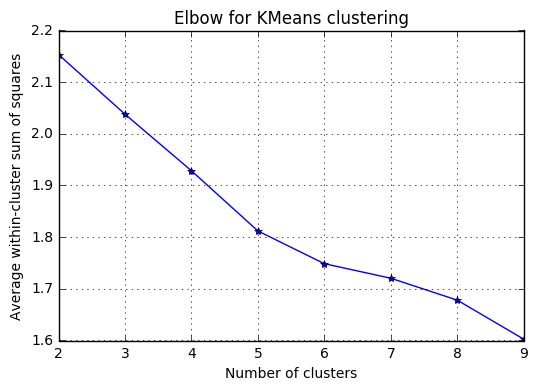

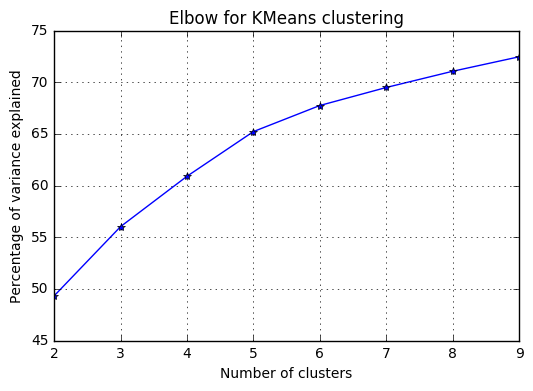

In [172]:
elbow(df, range(2,10))

Based on the elbow method, I picked 5 clusters

In [217]:
n = 5
km = KMeans(n_clusters=n, random_state=136)
km_label = km.fit_predict(df.iloc[:,2:])

In [218]:
km.cluster_centers_.shape

(5, 21)

### Plot the cluster centers

In [212]:
df_time = pd.DataFrame(df.iloc[:,2:]).T

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


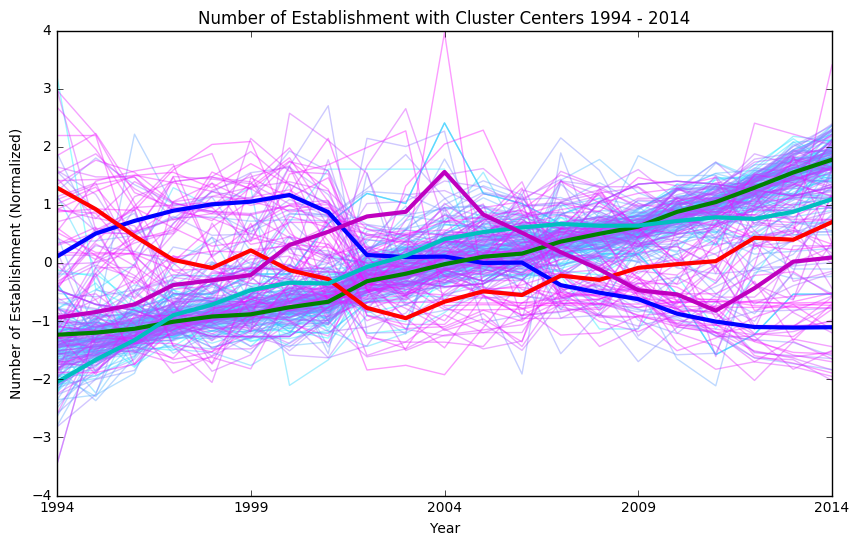

In [219]:
ax = df_time.plot(figsize=(10,6), legend=None, c=km_label, cmap=plt.cm.cool, alpha=0.4)
plt.plot(km.cluster_centers_.T, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Number of Establishment (Normalized)')
plt.title('Number of Establishment with Cluster Centers 1994 - 2014')


### I picked Gaussian Mixture as another clustering algorithm (I used the code from pur ADS course)

In [220]:
gm=GMM(n_components=5,random_state=136)
res = gm.fit(df.iloc[:,2:])
gm_label = res.predict(df.iloc[:,2:])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarn

### Plot clustering results over NYC Map

In [233]:
df['kmean'] = km_label
df['gaussian'] = gm_label
df.head(3)

,geometry,zipcode,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,kmean,gaussian
11372,POLYGON ((-73.86942457284175 40.74915687096787...,11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,...,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350,1,1
11004,POLYGON ((-73.71068374074007 40.75004039450917...,11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,...,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923,1,3
11040,POLYGON ((-73.70098278625547 40.73889569923034...,11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,...,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662,1,3


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


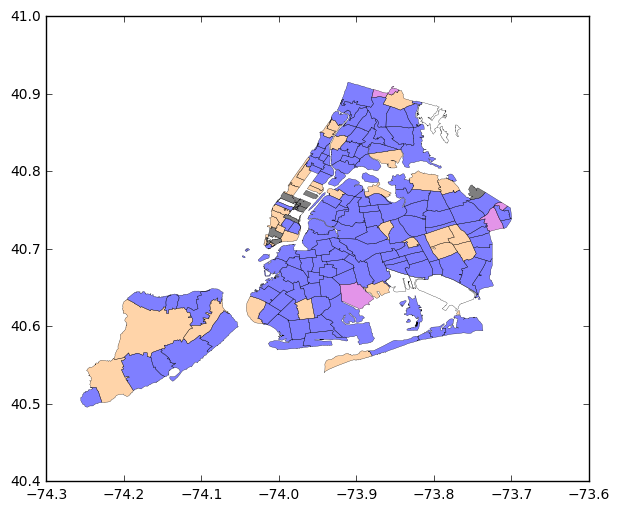

In [232]:
ax = df.plot(column = 'kmean', figsize=(10,6), colormap = 'gnuplot2', linewidth = 0.2)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


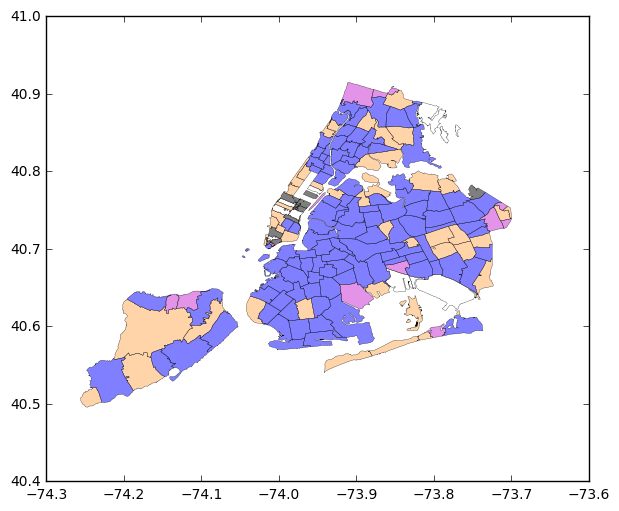

In [234]:
ax = df.plot(column = 'gaussian', figsize=(10,6), colormap = 'gnuplot2', linewidth = 0.2)